### CPE 4903 Boston Housing LR using Normal Equation ###

# Linear Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




I**mport the required Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from csv file downloaded from Kaggle.com**

In [28]:
# download data from https://www.kaggle.com/puxama/bostoncsv
boston = pd.read_csv('Boston.csv')

In [29]:
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Load the data into pandas dataframe**

**Data preprocessing**

In [30]:
# check for missing values in all the columns
boston.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [31]:
# drop extra useless column
boston=boston.drop(['Unnamed: 0'],axis=1)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Data Visualization**

In [32]:
boston['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

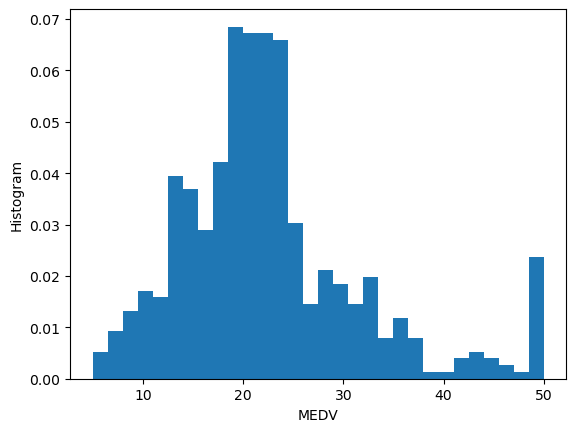

In [33]:
plt.hist(boston['medv'], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Histogram')
plt.xlabel('MEDV');

**Correlation matrix**

In [34]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr()

In [35]:
# Display and review correclation of each feature to target 'medv'. Higher than 0 and closer to -1/+1 is viable
correlation_matrix.style.background_gradient(cmap = 'coolwarm') # let's color code correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**Observations**




*   From the above coorelation plot we can see that **MEDV** is strongly correlated to **LSTAT**, **RM**

*  **RAD** and **TAX** are stronly correlated, so we don't include this in our features together to avoid multi-colinearity




<Figure size 640x480 with 0 Axes>

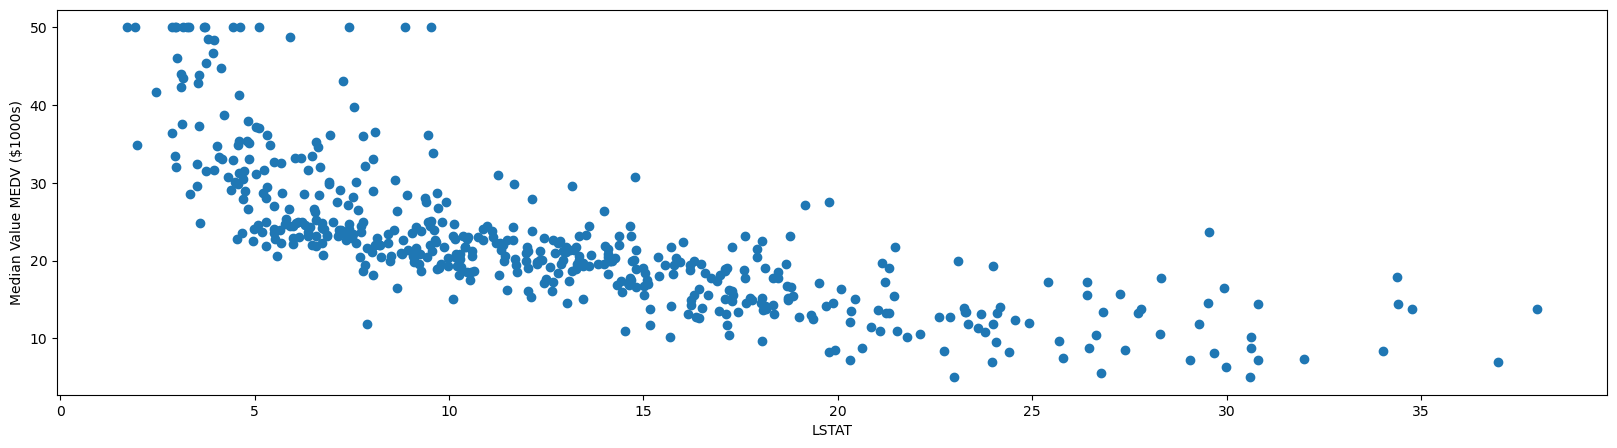

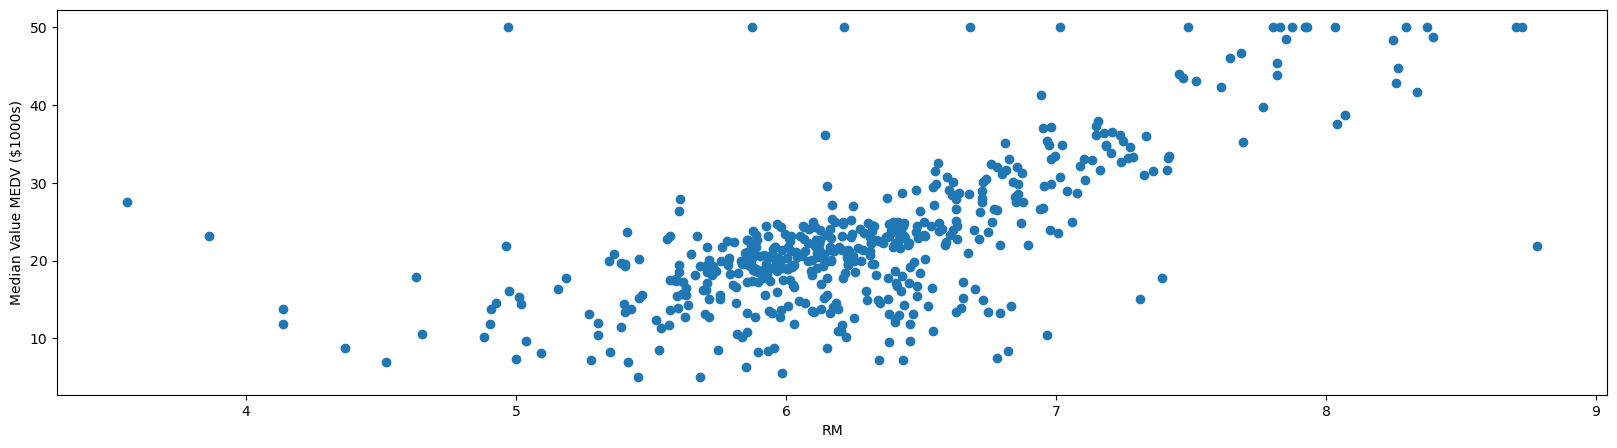

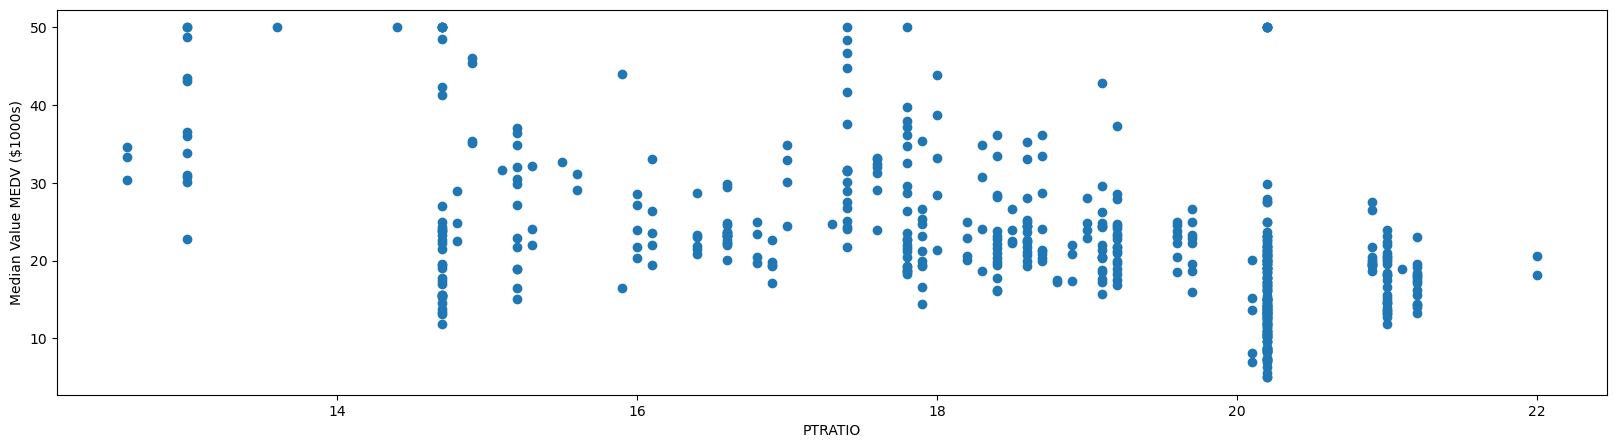

In [36]:

x1 = boston['lstat']
x2 = boston['rm']
x3 = boston['ptratio']
y = boston['medv']
plt.figure(1)
plt.figure(figsize=(20, 5))
plt.scatter(x1, y, marker='o')
plt.xlabel('LSTAT')
plt.ylabel('Median Value MEDV ($1000s)')
plt.figure(2)
plt.figure(figsize=(20, 5))
plt.scatter(x2, y, marker='o')
plt.xlabel('RM')
plt.ylabel('Median Value MEDV ($1000s)')
plt.figure(3)
plt.figure(figsize=(20, 5))
plt.scatter(x3, y, marker='o')
plt.xlabel('PTRATIO')
plt.ylabel('Median Value MEDV ($1000s)')
plt.show()


**Train the model using Normal Equation**
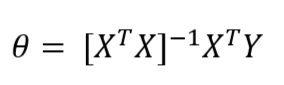

**Prepare the data for training**

In [38]:
x1 = boston['rm'].values #create numpy vectors
x2 = boston['lstat'].values
x3 = boston['ptratio'].values
Y = boston['medv'].values
m = len(x1)
nx = 2  # number of features
Y = Y.reshape(m,1)
X = np.block([x1.reshape(m,1), x2.reshape(m,1),x3.reshape(m,1)]) #useful block command to construct bigger matrix consisting of smaller ones

In [39]:
Y.shape

(506, 1)

**Split the data into training and testing sets**

In [40]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
m_train = len(Y_train)
m_test = len(Y_test)
X_train = np.block([np.ones((m_train,1)), X_train])
X_test = np.block([np.ones((m_test,1)), X_test])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404, 1)
(102, 1)


In [41]:
X_train

array([[ 1.   ,  5.701, 18.35 , 21.   ],
       [ 1.   ,  7.923,  3.16 , 13.6  ],
       [ 1.   ,  5.957, 20.62 , 20.2  ],
       ...,
       [ 1.   ,  5.67 , 17.6  , 19.2  ],
       [ 1.   ,  6.326, 10.97 , 18.6  ],
       [ 1.   ,  5.936,  5.57 , 22.   ]])

In [42]:
temp1 = np.linalg.inv(np.dot(X_train.T,X_train))
temp2 = np.dot(X_train.T,Y_train)
theta = np.dot(temp1, temp2)
print(theta)

[[23.68107027]
 [ 3.9169303 ]
 [-0.64697098]
 [-0.95483295]]


In [43]:
y_train_predict = np.dot(X_train,theta)
y_test_predict = np.dot(X_test,theta)

y_error = Y_train - y_train_predict
m = len(y_error)
J = np.dot(y_error.T, y_error)/m
print('The train MSE is: %6.2f'% J)

y_error = Y_test - y_test_predict
m = len(y_error)
J = np.dot(y_error.T, y_error)/m
print('The test MSE is: %6.2f'% J)

The train MSE is:  28.13
The test MSE is:  24.15


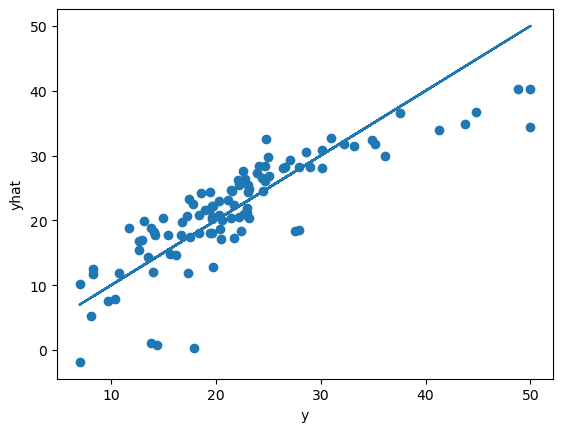

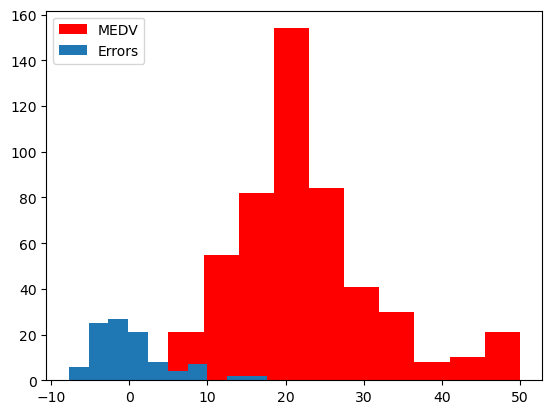

In [44]:
# plotting the y_test vs y_pred
# ideally should have been a straight linear (slope =1) line
plt.figure(1)
plt.scatter(Y_test, y_test_predict)
plt.plot(Y_test, Y_test)
plt.xlabel('y')
plt.ylabel('yhat')

plt.figure(2)
plt.hist(Y, color = 'r', label='MEDV')
plt.hist(Y_test-y_test_predict,  label='Errors')
plt.legend(loc="upper left")
plt.show()

In [45]:
  print(" Sample   label          predicted        %error")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("------------------------------------------------")
  for i in range(20):
    print ("%5.0f %6.0f %15.0f %15.0f" % (i, Y_test[i], y_test_predict[i], (Y_test[i] - y_test_predict[i])*100/Y_test[i]))
           

 Sample   label          predicted        %error
  value   value          value
          in thousand$   in thousand$
------------------------------------------------
    0     38              37               3
    1     28              28              -1
    2     23              26             -16
    3     14               1              92
    4     35              32              10
    5     10               8              24
    6     24              27             -14
    7     29              28               3
    8     23              26             -16
    9     23              20              12
   10     33              32               5
   11     19              22             -13
   12     20              23             -14
   13     36              30              17
   14     24              27              -9
   15     17              21             -20
   16     18               0              98
   17     20              22             -13
   18     20           

In [47]:
### Comparison
## Adding a third feature with at least .5 correlation
# I added 'ptratio' as my third value since it had a value of -0.507787. 

## Compare to test evaluation to the baseline in terms of MSE and prediction error distribution.
## What is comparison between 2 inputs and 3 inputs in terms of prediction performance?
# The MSE was 31.78 previously, with the addition of ptratio I got a value of 28.13 for the training.
# MSE for test previously was 26.39, I got 24.15.
# The performance prediction with increased coorelated variables decreased errors. The model got
# better than it was previously. 